<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [3]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-09-09 18:02:09--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  62.7MB/s    in 3.2s    

2025-09-09 18:02:12 (63.1 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [4]:
!pip install pandas

In [5]:
!pip install matplotlib

In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [10]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [11]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [12]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [13]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


Unique YearsCode values:
['3' '12' '15' '27' '7' '32' '38' '23' '50' '30' '21' '10' '6' '40' '20'
 '9' '25' '14' '11' '28' '16' '18' '37' '47' '1' '17' '36' '19' '24' '2'
 '5' '34' '48' '46' '26' '13' '33' '31' '45' '22' '41' '35' '4' '8' '44'
 '29' '42' 'More than 50 years' '39' '43' 'Less than 1 year' '49']


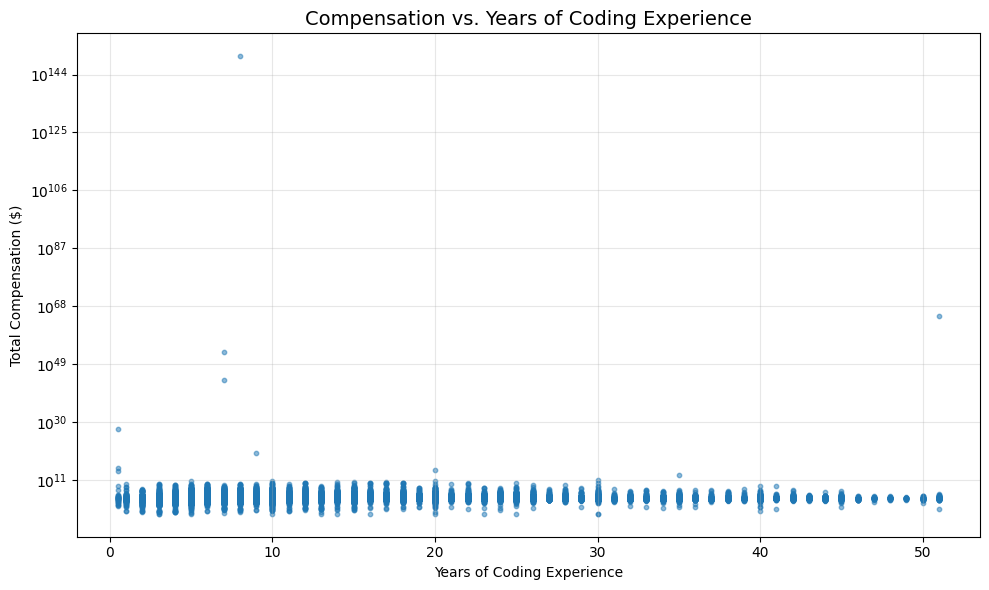

In [16]:
# Compensation by experience level
QUERY = """
SELECT YearsCode, CompTotal 
FROM main 
WHERE CompTotal IS NOT NULL 
AND CompTotal > 0 
AND YearsCode IS NOT NULL
"""
df_exp_comp = pd.read_sql_query(QUERY, conn)

# Clean YearsCode data (handle non-numeric values)
# First, let's see what values we have
print("Unique YearsCode values:")
print(df_exp_comp['YearsCode'].unique())

# Filter out non-numeric values and convert to numeric
df_exp_comp = df_exp_comp[df_exp_comp['YearsCode'].str.isnumeric() | (df_exp_comp['YearsCode'] == 'Less than 1 year') | (df_exp_comp['YearsCode'] == 'More than 50 years')]

# Convert categorical values to numeric
df_exp_comp['YearsCode'] = df_exp_comp['YearsCode'].replace({
    'Less than 1 year': '0.5',
    'More than 50 years': '51'
})

# Convert to numeric
df_exp_comp['YearsCode'] = pd.to_numeric(df_exp_comp['YearsCode'])

# Create a scatter plot to show relationship
plt.figure(figsize=(10, 6))
plt.scatter(df_exp_comp['YearsCode'], df_exp_comp['CompTotal'], alpha=0.5, s=10)
plt.title('Compensation vs. Years of Coding Experience', fontsize=14)
plt.xlabel('Years of Coding Experience')
plt.ylabel('Total Compensation ($)')
plt.yscale('log')  # Use log scale for better visualization
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


Unique YearsCodePro values:
['17' '27' '7' '11' '25' '12' '10' '3' 'Less than 1 year' '18' '37' '15'
 '20' '6' '2' '16' '8' '14' '4' '45' '1' '24' '29' '5' '30' '26' '9' '33'
 '13' '35' '23' '22' '31' '19' '21' '28' '34' '32' '40' '50' '39' '44'
 '42' '41' '36' '38' 'More than 50 years' '43' '47' '48' '46' '49']

Number of records: 51610

Records after cleaning: 51610

Basic statistics for YearsCodePro:
count    51610.000000
mean        10.212013
std          9.079437
min          0.500000
25%          3.000000
50%          7.000000
75%         15.000000
max         51.000000
Name: YearsCodePro, dtype: float64


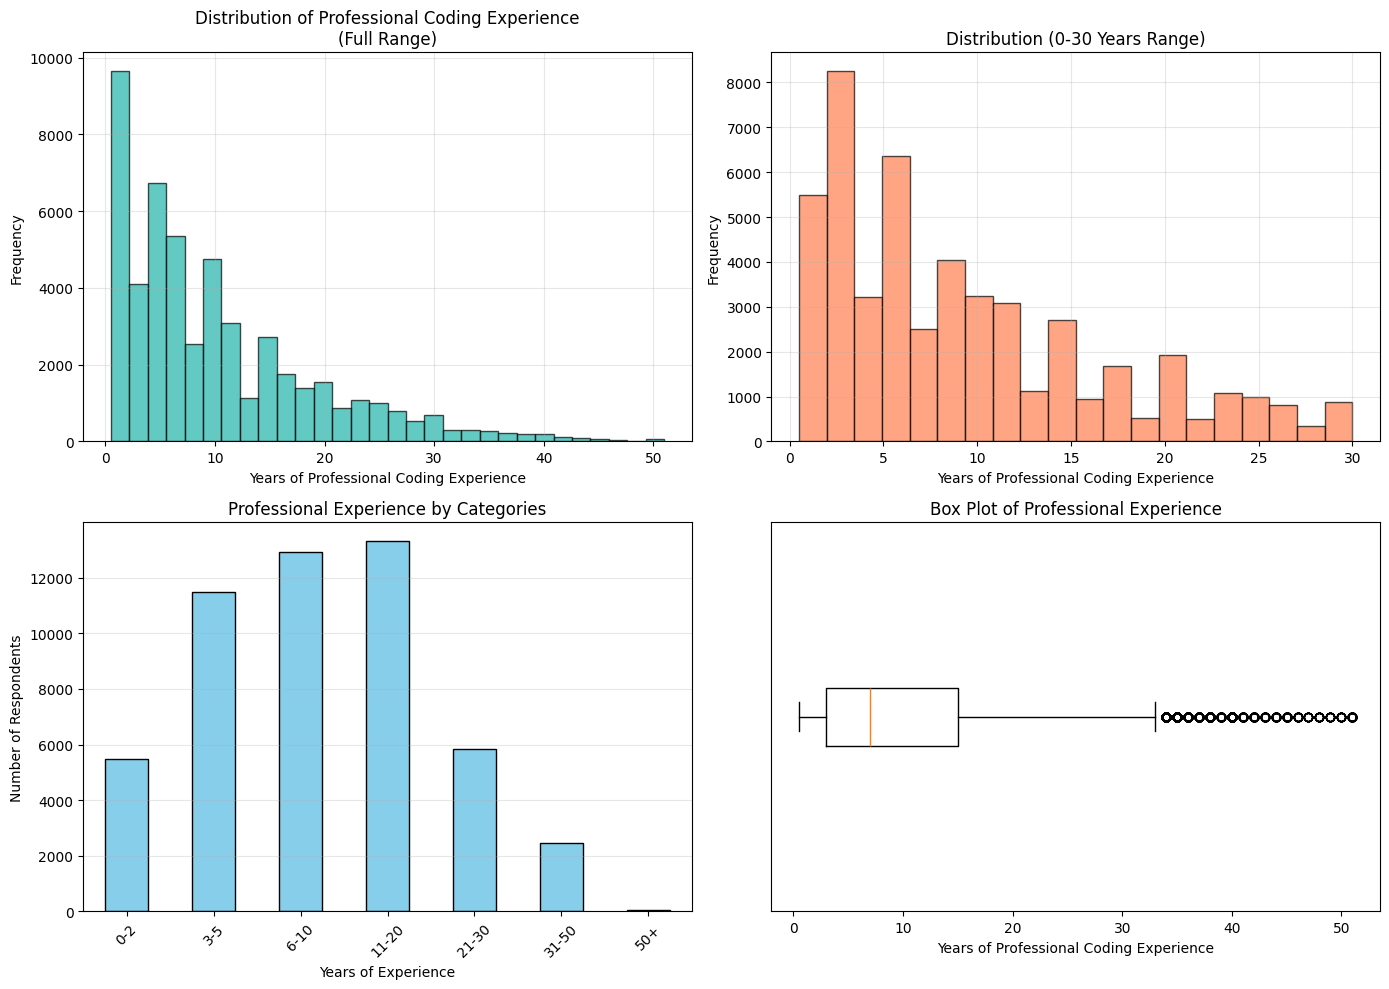


DETAILED ANALYSIS OF PROFESSIONAL CODING EXPERIENCE
Total respondents with experience data: 51610
Median years of experience: 7.0 years
Mean years of experience: 10.2 years
Standard deviation: 9.1 years
25th percentile: 3.0 years
50th percentile: 7.0 years
75th percentile: 15.0 years
90th percentile: 24.0 years
95th percentile: 29.0 years

Experience Category Breakdown:
0-2 years: 5495 respondents (10.6%)
3-5 years: 11476 respondents (22.2%)
6-10 years: 12928 respondents (25.0%)
11-20 years: 13327 respondents (25.8%)
21-30 years: 5843 respondents (11.3%)
31-50 years: 2477 respondents (4.8%)
50+ years: 64 respondents (0.1%)

Most common single year: 2.0 years


In [17]:
# Query YearsCodePro data from the database
QUERY = """
SELECT YearsCodePro 
FROM main 
WHERE YearsCodePro IS NOT NULL
"""
df_years_code_pro = pd.read_sql_query(QUERY, conn)

# Check what values we have in YearsCodePro
print("Unique YearsCodePro values:")
print(df_years_code_pro['YearsCodePro'].unique())
print(f"\nNumber of records: {len(df_years_code_pro)}")

# Clean and convert the data
# Handle categorical values and convert to numeric
df_years_code_pro_clean = df_years_code_pro.copy()
df_years_code_pro_clean['YearsCodePro'] = df_years_code_pro_clean['YearsCodePro'].replace({
    'Less than 1 year': '0.5',
    'More than 50 years': '51'
})

# Convert to numeric, coercing errors to NaN
df_years_code_pro_clean['YearsCodePro'] = pd.to_numeric(df_years_code_pro_clean['YearsCodePro'], errors='coerce')

# Drop any remaining NaN values
df_years_code_pro_clean = df_years_code_pro_clean.dropna()

print(f"\nRecords after cleaning: {len(df_years_code_pro_clean)}")
print("\nBasic statistics for YearsCodePro:")
print(df_years_code_pro_clean['YearsCodePro'].describe())

# Create the histogram
plt.figure(figsize=(14, 10))

# Subplot 1: Full distribution
plt.subplot(2, 2, 1)
plt.hist(df_years_code_pro_clean['YearsCodePro'], bins=30, alpha=0.7, color='lightseagreen', edgecolor='black')
plt.title('Distribution of Professional Coding Experience\n(Full Range)', fontsize=12)
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

# Subplot 2: Focus on common range (0-30 years)
plt.subplot(2, 2, 2)
common_range_data = df_years_code_pro_clean[df_years_code_pro_clean['YearsCodePro'] <= 30]
plt.hist(common_range_data['YearsCodePro'], bins=20, alpha=0.7, color='coral', edgecolor='black')
plt.title('Distribution (0-30 Years Range)', fontsize=12)
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

# Subplot 3: Experience distribution by categories
plt.subplot(2, 2, 3)
# Create experience categories
bins = [0, 2, 5, 10, 20, 30, 50, 100]
labels = ['0-2', '3-5', '6-10', '11-20', '21-30', '31-50', '50+']
df_years_code_pro_clean['Experience_Category'] = pd.cut(df_years_code_pro_clean['YearsCodePro'], bins=bins, labels=labels, right=False)

category_counts = df_years_code_pro_clean['Experience_Category'].value_counts().sort_index()
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Professional Experience by Categories', fontsize=12)
plt.xlabel('Years of Experience')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Subplot 4: Box plot to show distribution statistics
plt.subplot(2, 2, 4)
plt.boxplot(df_years_code_pro_clean['YearsCodePro'], vert=False)
plt.title('Box Plot of Professional Experience', fontsize=12)
plt.xlabel('Years of Professional Coding Experience')
plt.yticks([])

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n" + "="*60)
print("DETAILED ANALYSIS OF PROFESSIONAL CODING EXPERIENCE")
print("="*60)
print(f"Total respondents with experience data: {len(df_years_code_pro_clean)}")
print(f"Median years of experience: {df_years_code_pro_clean['YearsCodePro'].median():.1f} years")
print(f"Mean years of experience: {df_years_code_pro_clean['YearsCodePro'].mean():.1f} years")
print(f"Standard deviation: {df_years_code_pro_clean['YearsCodePro'].std():.1f} years")

# Experience distribution percentiles
percentiles = [25, 50, 75, 90, 95]
for p in percentiles:
    value = df_years_code_pro_clean['YearsCodePro'].quantile(p/100)
    print(f"{p}th percentile: {value:.1f} years")

# Experience category breakdown
print("\nExperience Category Breakdown:")
for category in labels:
    count = len(df_years_code_pro_clean[df_years_code_pro_clean['Experience_Category'] == category])
    percentage = (count / len(df_years_code_pro_clean)) * 100
    print(f"{category} years: {count} respondents ({percentage:.1f}%)")

# Most common experience ranges
print(f"\nMost common single year: {df_years_code_pro_clean['YearsCodePro'].mode().values[0]} years")

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


Total records: 33613

Unique Age values:
['18-24 years old' '25-34 years old' '35-44 years old' '45-54 years old'
 '55-64 years old' '65 years or older' 'Under 18 years old'
 'Prefer not to say']

Age value counts:
Age
25-34 years old       14624
35-44 years old        9324
18-24 years old        4606
45-54 years old        3495
55-64 years old        1272
65 years or older       194
Under 18 years old       84
Prefer not to say        14
Name: count, dtype: int64

Records after age grouping: 33613

Age group distribution:
Age_Group
18-24     4690
25-34    14624
35-44     9324
45-54     3495
55-64     1272
65+        208
Name: count, dtype: int64

After removing compensation outliers (above $119,737,200.00): 33276 records


/tmp/ipykernel_1708/4105173653.py:92: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=age_groups)


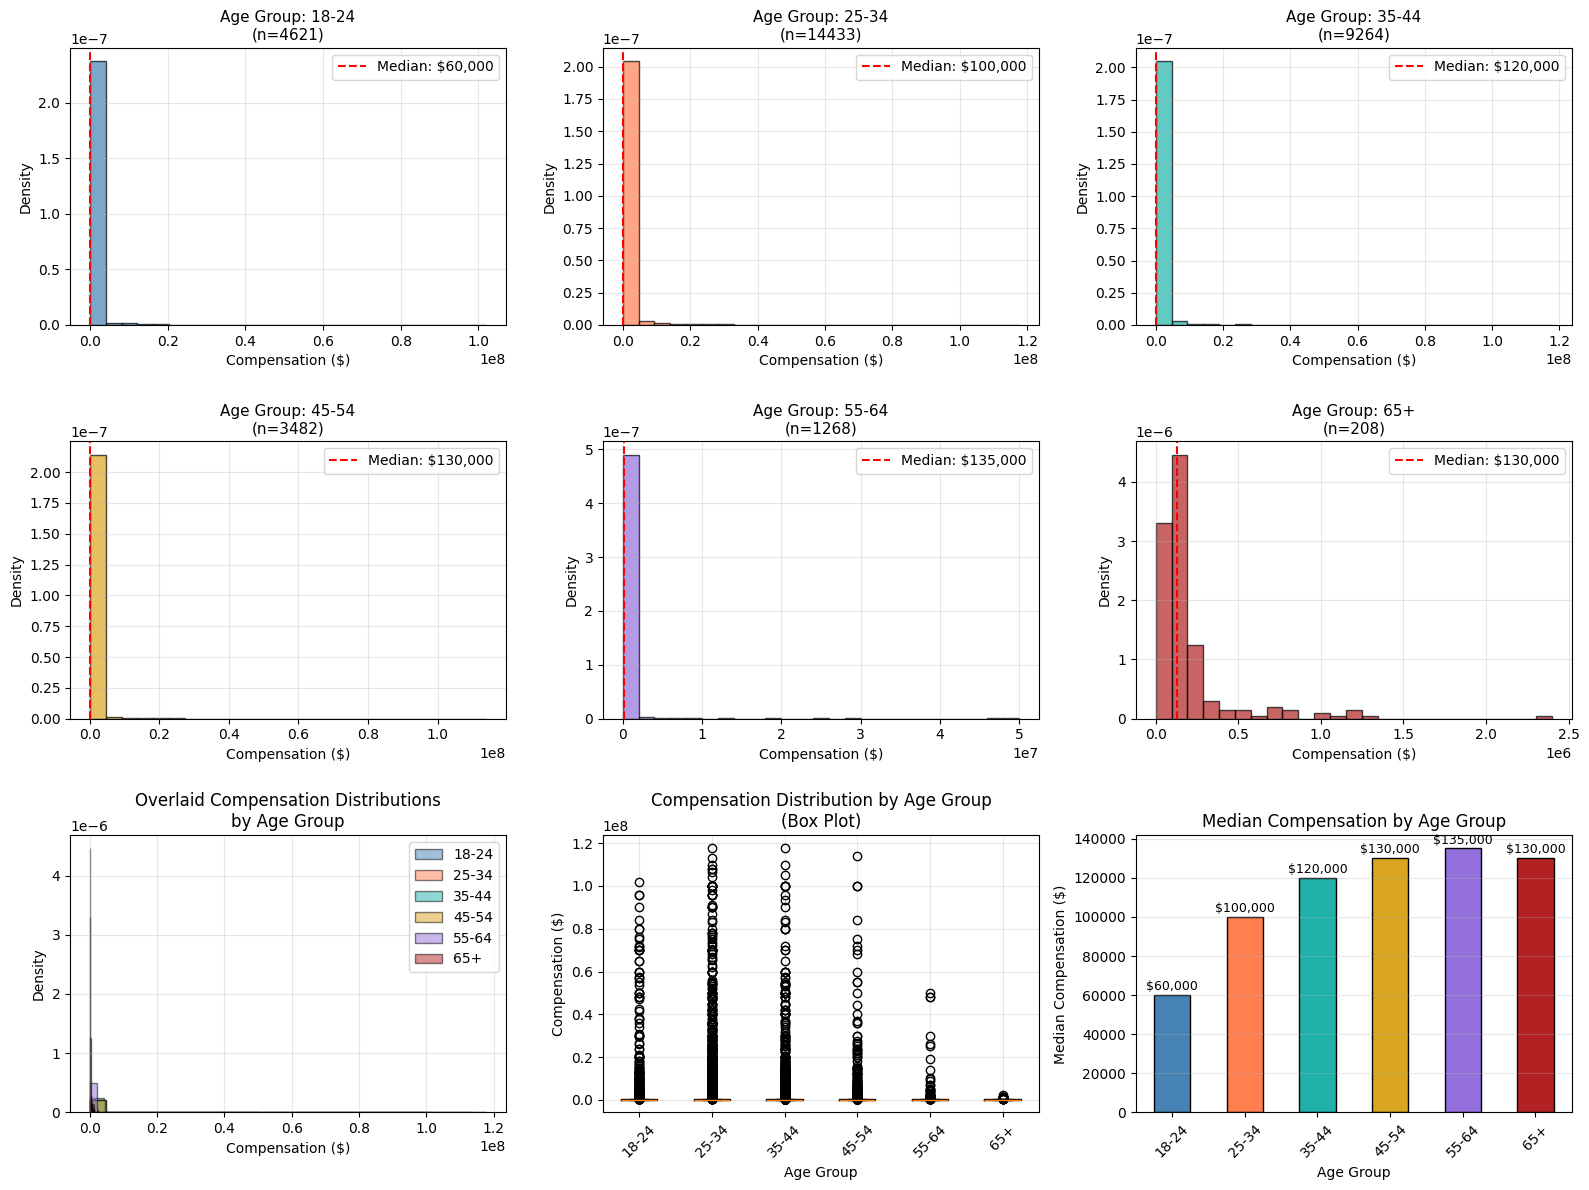


DETAILED COMPENSATION ANALYSIS BY AGE GROUP

Age Group: 18-24 (n=4621)
  Mean compensation: $1,047,705.23
  Median compensation: $60,000.00
  Standard deviation: $6,247,373.48
  25th percentile: $28,000.00
  75th percentile: $240,000.00

Age Group: 25-34 (n=14433)
  Mean compensation: $1,227,614.39
  Median compensation: $100,000.00
  Standard deviation: $6,546,433.20
  25th percentile: $56,000.00
  75th percentile: $280,000.00

Age Group: 35-44 (n=9264)
  Mean compensation: $993,685.35
  Median compensation: $120,000.00
  Standard deviation: $5,623,067.24
  25th percentile: $71,638.75
  75th percentile: $240,000.00

Age Group: 45-54 (n=3482)
  Mean compensation: $823,974.79
  Median compensation: $130,000.00
  Standard deviation: $5,167,135.56
  25th percentile: $78,940.00
  75th percentile: $220,000.00

Age Group: 55-64 (n=1268)
  Mean compensation: $467,598.89
  Median compensation: $135,000.00
  Standard deviation: $2,846,245.57
  25th percentile: $83,000.00
  75th percentile: $20

In [18]:
# Query data for CompTotal and Age
QUERY = """
SELECT Age, CompTotal 
FROM main 
WHERE Age IS NOT NULL 
AND CompTotal IS NOT NULL 
AND CompTotal > 0
"""
df_age_comp = pd.read_sql_query(QUERY, conn)

print(f"Total records: {len(df_age_comp)}")
print("\nUnique Age values:")
print(df_age_comp['Age'].unique())

# Clean Age data - remove any unexpected values and create age groups
# Let's first see what age values we have
age_counts = df_age_comp['Age'].value_counts()
print("\nAge value counts:")
print(age_counts)

# Create age groups for better analysis
def create_age_groups(age):
    if age in ['Under 18 years old', '18-24 years old']:
        return '18-24'
    elif age == '25-34 years old':
        return '25-34'
    elif age == '35-44 years old':
        return '35-44'
    elif age == '45-54 years old':
        return '45-54'
    elif age == '55-64 years old':
        return '55-64'
    elif age in ['65 years or older', 'Prefer not to say']:
        return '65+'
    else:
        return None

df_age_comp['Age_Group'] = df_age_comp['Age'].apply(create_age_groups)
df_age_comp = df_age_comp.dropna(subset=['Age_Group'])

print(f"\nRecords after age grouping: {len(df_age_comp)}")
print("\nAge group distribution:")
print(df_age_comp['Age_Group'].value_counts().sort_index())

# Remove extreme compensation outliers (top 1%) for better visualization
Q99 = df_age_comp['CompTotal'].quantile(0.99)
df_age_comp_filtered = df_age_comp[df_age_comp['CompTotal'] <= Q99]

print(f"\nAfter removing compensation outliers (above ${Q99:,.2f}): {len(df_age_comp_filtered)} records")

# Create comparative histograms
plt.figure(figsize=(16, 12))

# Get unique age groups
age_groups = sorted(df_age_comp_filtered['Age_Group'].unique())
colors = ['steelblue', 'coral', 'lightseagreen', 'goldenrod', 'mediumpurple', 'firebrick']

# Individual histograms for each age group
for i, age_group in enumerate(age_groups):
    plt.subplot(3, 3, i+1)
    group_data = df_age_comp_filtered[df_age_comp_filtered['Age_Group'] == age_group]['CompTotal']
    
    plt.hist(group_data, bins=25, alpha=0.7, color=colors[i], edgecolor='black', density=True)
    plt.title(f'Age Group: {age_group}\n(n={len(group_data)})', fontsize=11)
    plt.xlabel('Compensation ($)')
    plt.ylabel('Density')
    plt.grid(alpha=0.3)
    
    # Add median line
    median_comp = group_data.median()
    plt.axvline(median_comp, color='red', linestyle='--', linewidth=1.5, 
               label=f'Median: ${median_comp:,.0f}')
    plt.legend()

# Overlaid histograms for comparison
plt.subplot(3, 3, 7)
for i, age_group in enumerate(age_groups):
    group_data = df_age_comp_filtered[df_age_comp_filtered['Age_Group'] == age_group]['CompTotal']
    plt.hist(group_data, bins=25, alpha=0.5, color=colors[i], edgecolor='black', 
             density=True, label=age_group)

plt.title('Overlaid Compensation Distributions\nby Age Group', fontsize=12)
plt.xlabel('Compensation ($)')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.3)

# Box plot comparison
plt.subplot(3, 3, 8)
boxplot_data = [df_age_comp_filtered[df_age_comp_filtered['Age_Group'] == group]['CompTotal'] 
                for group in age_groups]
plt.boxplot(boxplot_data, labels=age_groups)
plt.title('Compensation Distribution by Age Group\n(Box Plot)', fontsize=12)
plt.xlabel('Age Group')
plt.ylabel('Compensation ($)')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

# Median compensation by age group
plt.subplot(3, 3, 9)
median_comps = df_age_comp_filtered.groupby('Age_Group')['CompTotal'].median().sort_index()
median_comps.plot(kind='bar', color=colors[:len(age_groups)], edgecolor='black')
plt.title('Median Compensation by Age Group', fontsize=12)
plt.xlabel('Age Group')
plt.ylabel('Median Compensation ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(median_comps):
    plt.text(i, v + 1000, f'${v:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Detailed statistical analysis
print("\n" + "="*70)
print("DETAILED COMPENSATION ANALYSIS BY AGE GROUP")
print("="*70)

# Summary statistics for each age group
for age_group in age_groups:
    group_data = df_age_comp_filtered[df_age_comp_filtered['Age_Group'] == age_group]['CompTotal']
    
    print(f"\nAge Group: {age_group} (n={len(group_data)})")
    print(f"  Mean compensation: ${group_data.mean():,.2f}")
    print(f"  Median compensation: ${group_data.median():,.2f}")
    print(f"  Standard deviation: ${group_data.std():,.2f}")
    print(f"  25th percentile: ${group_data.quantile(0.25):,.2f}")
    print(f"  75th percentile: ${group_data.quantile(0.75):,.2f}")

# Statistical comparison
print("\n" + "-"*50)
print("COMPARATIVE ANALYSIS")
print("-"*50)

# Calculate percentage differences
youngest_median = df_age_comp_filtered[df_age_comp_filtered['Age_Group'] == '18-24']['CompTotal'].median()
oldest_median = df_age_comp_filtered[df_age_comp_filtered['Age_Group'] == '65+']['CompTotal'].median()

print(f"Median compensation difference (18-24 vs 65+): ${oldest_median - youngest_median:,.2f}")
print(f"Percentage difference: {(oldest_median/youngest_median - 1)*100:.1f}%")

# Experience premium analysis
print(f"\nCompensation growth from 18-24 to peak age group:")
for i in range(1, len(age_groups)):
    current_median = df_age_comp_filtered[df_age_comp_filtered['Age_Group'] == age_groups[i]]['CompTotal'].median()
    prev_median = df_age_comp_filtered[df_age_comp_filtered['Age_Group'] == age_groups[i-1]]['CompTotal'].median()
    
    if prev_median > 0:  # Avoid division by zero
        growth = (current_median / prev_median - 1) * 100
        print(f"  {age_groups[i-1]} → {age_groups[i]}: {growth:+.1f}%")

# Create a pivot table for additional insights
pivot_table = df_age_comp_filtered.pivot_table(
    values='CompTotal', 
    index='Age_Group', 
    aggfunc=['count', 'mean', 'median', 'std', 'min', 'max']
).round(2)

print("\nPivot Table Summary:")
print(pivot_table)

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


Total records with TimeSearching data: 28911

Unique TimeSearching values:
['30-60 minutes a day' '60-120 minutes a day' '15-30 minutes a day'
 'Less than 15 minutes a day' 'Over 120 minutes a day']

TimeSearching value counts:
TimeSearching
15-30 minutes a day            7805
30-60 minutes a day           10951
60-120 minutes a day           5275
Less than 15 minutes a day     2689
Over 120 minutes a day         2191
Name: count, dtype: int64

Records after age grouping: 28911

Age group distribution:
Age_Group
18-24     4247
25-34    12603
35-44     7960
45-54     2955
55-64      980
65+        166
Name: count, dtype: int64

TimeSearching numerical conversion:
  Less than 15 minutes a day: 0.125 hours (n=2689)
  15-30 minutes a day: 0.375 hours (n=7805)
  30-60 minutes a day: 0.75 hours (n=10951)
  60-120 minutes a day: 1.5 hours (n=5275)
  Over 120 minutes a day: 3.0 hours (n=2191)


/tmp/ipykernel_1708/3606285.py:108: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=age_groups[:len(boxplot_data)])


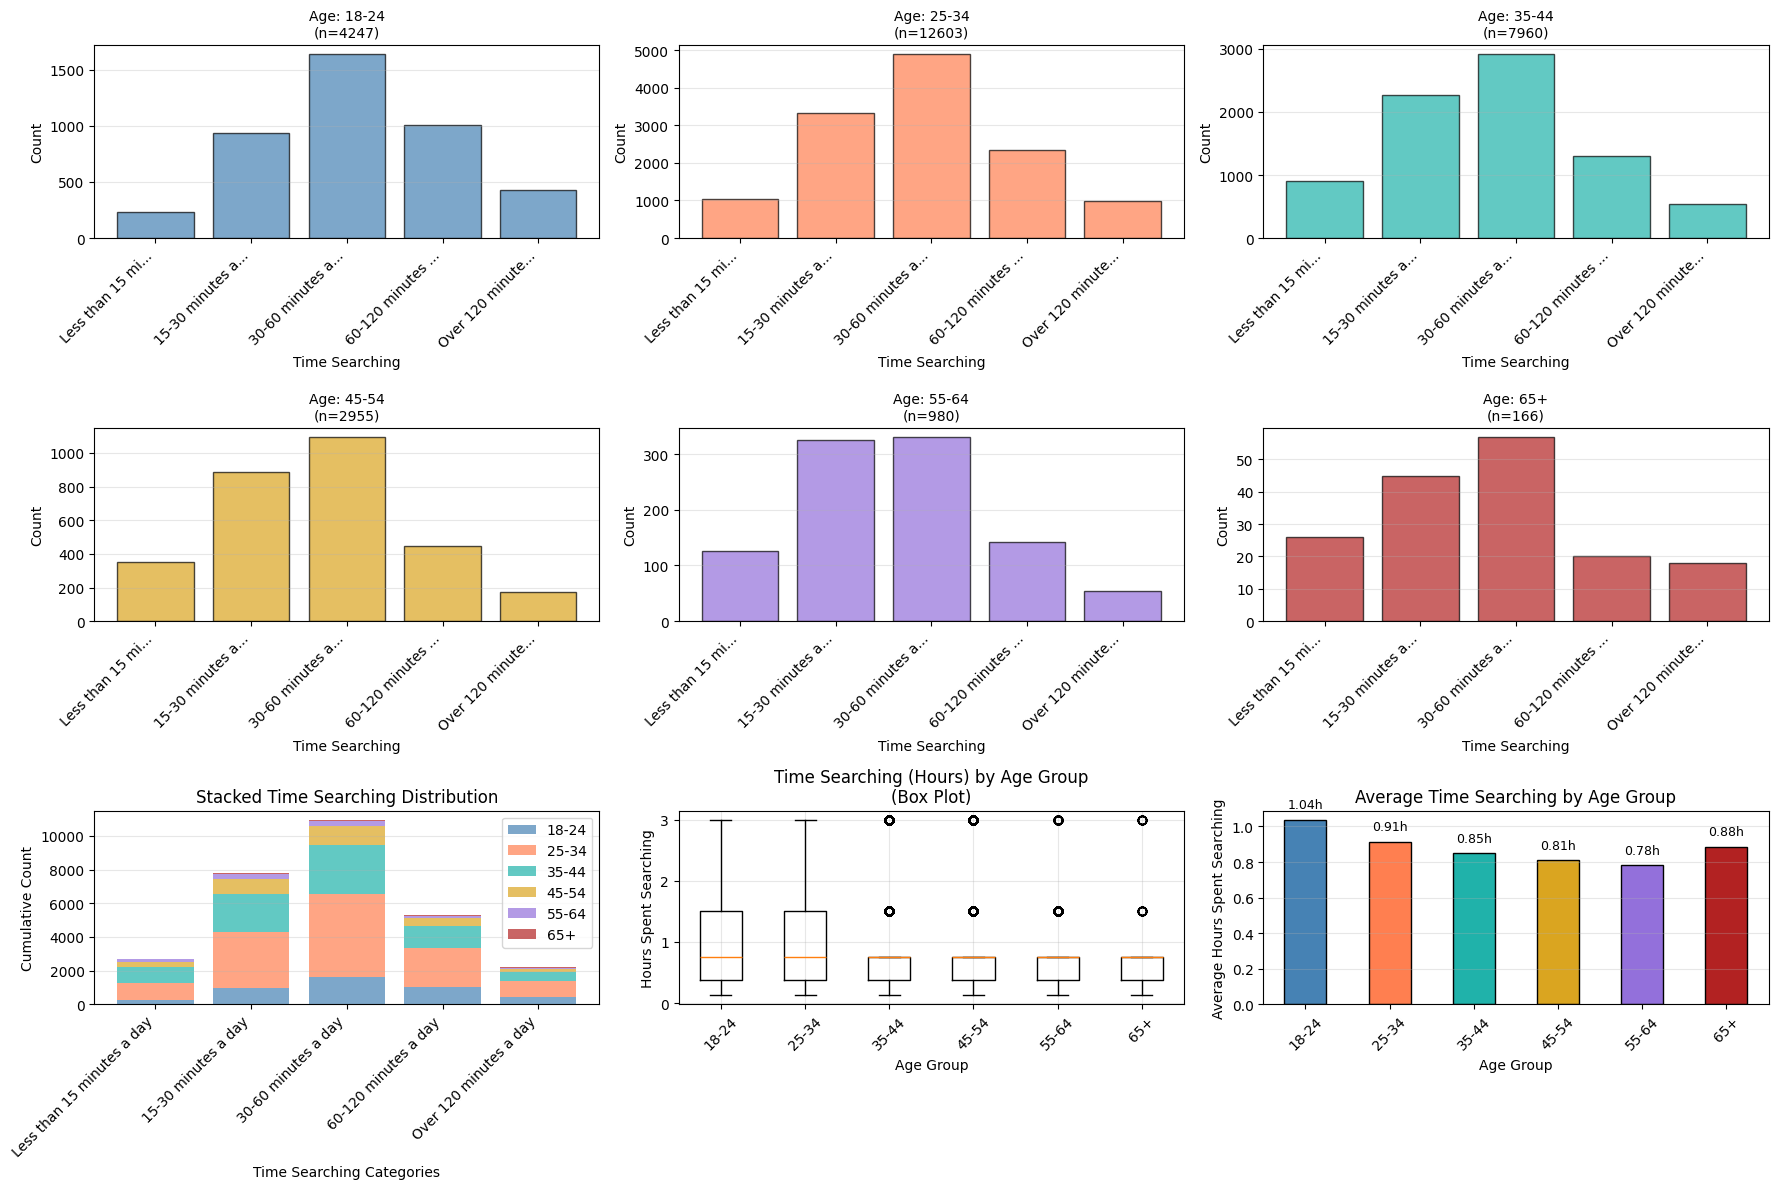

ModuleNotFoundError: No module named 'scipy'

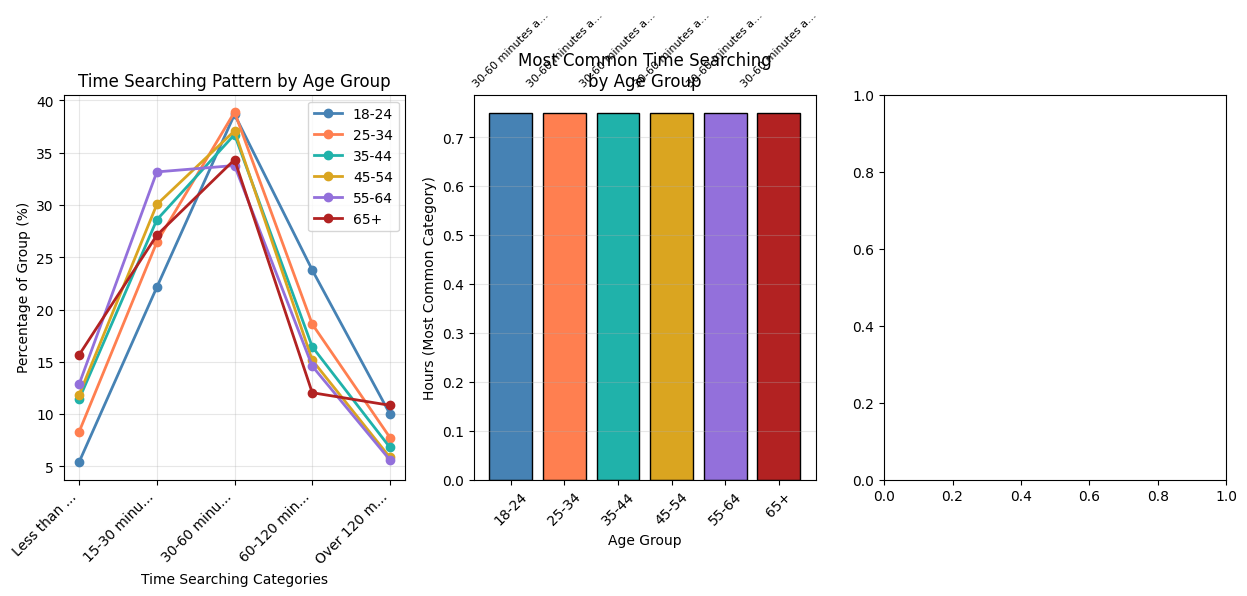

In [26]:
# First, let's explore the TimeSearching field to understand its values
QUERY = """
SELECT TimeSearching, Age 
FROM main 
WHERE TimeSearching IS NOT NULL 
AND Age IS NOT NULL
"""
df_time_searching = pd.read_sql_query(QUERY, conn)

print(f"Total records with TimeSearching data: {len(df_time_searching)}")
print("\nUnique TimeSearching values:")
print(df_time_searching['TimeSearching'].unique())
print("\nTimeSearching value counts:")
print(df_time_searching['TimeSearching'].value_counts().sort_index())

# Create age groups
def create_age_groups(age):
    if age in ['Under 18 years old', '18-24 years old']:
        return '18-24'
    elif age == '25-34 years old':
        return '25-34'
    elif age == '35-44 years old':
        return '35-44'
    elif age == '45-54 years old':
        return '45-54'
    elif age == '55-64 years old':
        return '55-64'
    elif age in ['65 years or older', 'Prefer not to say']:
        return '65+'
    else:
        return None

df_time_searching['Age_Group'] = df_time_searching['Age'].apply(create_age_groups)
df_time_searching = df_time_searching.dropna(subset=['Age_Group'])

print(f"\nRecords after age grouping: {len(df_time_searching)}")
print("\nAge group distribution:")
print(df_time_searching['Age_Group'].value_counts().sort_index())

# Convert TimeSearching to numerical values based on the actual data
time_searching_mapping = {
    'Less than 15 minutes a day': 0.125,  # Approx 7.5 minutes
    '15-30 minutes a day': 0.375,         # Average of 22.5 minutes
    '30-60 minutes a day': 0.75,          # Average of 45 minutes
    '60-120 minutes a day': 1.5,          # Average of 1.5 hours
    'Over 120 minutes a day': 3.0         # Approx 3 hours
}

df_time_searching['TimeSearching_Hours'] = df_time_searching['TimeSearching'].map(time_searching_mapping)

print(f"\nTimeSearching numerical conversion:")
for category, num_value in time_searching_mapping.items():
    count = len(df_time_searching[df_time_searching['TimeSearching'] == category])
    print(f"  {category}: {num_value} hours (n={count})")

# Create comparative histograms
plt.figure(figsize=(18, 12))

# Get unique age groups
age_groups = sorted(df_time_searching['Age_Group'].unique())
colors = ['steelblue', 'coral', 'lightseagreen', 'goldenrod', 'mediumpurple', 'firebrick']
category_order = list(time_searching_mapping.keys())

# 1. Individual subplots for each age group
for i, age_group in enumerate(age_groups):
    plt.subplot(3, 3, i+1)
    group_data = df_time_searching[df_time_searching['Age_Group'] == age_group]['TimeSearching']
    category_counts = group_data.value_counts().reindex(category_order).fillna(0)
    
    plt.bar(range(len(category_counts)), category_counts.values, alpha=0.7, 
            color=colors[i], edgecolor='black')
    plt.title(f'Age: {age_group}\n(n={len(group_data)})', fontsize=10)
    plt.xlabel('Time Searching')
    plt.ylabel('Count')
    plt.xticks(range(len(category_counts)), [cat[:15] + '...' for cat in category_order], rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)

# 2. Stacked bar chart showing proportions
plt.subplot(3, 3, 7)
for i, age_group in enumerate(age_groups):
    group_data = df_time_searching[df_time_searching['Age_Group'] == age_group]
    counts = [len(group_data[group_data['TimeSearching'] == cat]) for cat in category_order]
    
    if i == 0:
        plt.bar(category_order, counts, alpha=0.7, label=age_group, color=colors[i])
        bottom = counts
    else:
        plt.bar(category_order, counts, bottom=bottom, alpha=0.7, label=age_group, color=colors[i])
        bottom = [b + c for b, c in zip(bottom, counts)]

plt.title('Stacked Time Searching Distribution', fontsize=12)
plt.xlabel('Time Searching Categories')
plt.ylabel('Cumulative Count')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# 3. Box plot of numerical hours by age group
plt.subplot(3, 3, 8)
boxplot_data = []
for group in age_groups:
    group_data = df_time_searching[df_time_searching['Age_Group'] == group]['TimeSearching_Hours']
    # Filter out NaN values
    group_data = group_data.dropna()
    if len(group_data) > 0:
        boxplot_data.append(group_data)

plt.boxplot(boxplot_data, labels=age_groups[:len(boxplot_data)])
plt.title('Time Searching (Hours) by Age Group\n(Box Plot)', fontsize=12)
plt.xlabel('Age Group')
plt.ylabel('Hours Spent Searching')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

# 4. Mean time searching by age group
plt.subplot(3, 3, 9)
mean_hours = df_time_searching.groupby('Age_Group')['TimeSearching_Hours'].mean().sort_index()
mean_hours.plot(kind='bar', color=colors[:len(age_groups)], edgecolor='black')
plt.title('Average Time Searching by Age Group', fontsize=12)
plt.xlabel('Age Group')
plt.ylabel('Average Hours Spent Searching')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(mean_hours):
    plt.text(i, v + 0.05, f'{v:.2f}h', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Create additional visualizations in a new figure
plt.figure(figsize=(15, 5))

# 5. Percentage distribution by category for each age group
plt.subplot(1, 3, 1)
for i, age_group in enumerate(age_groups):
    group_data = df_time_searching[df_time_searching['Age_Group'] == age_group]
    category_percentages = []
    for category in category_order:
        percentage = (len(group_data[group_data['TimeSearching'] == category]) / len(group_data)) * 100
        category_percentages.append(percentage)
    
    plt.plot(range(len(category_order)), category_percentages, marker='o', 
             label=age_group, color=colors[i], linewidth=2)

plt.title('Time Searching Pattern by Age Group', fontsize=12)
plt.xlabel('Time Searching Categories')
plt.ylabel('Percentage of Group (%)')
plt.xticks(range(len(category_order)), [cat[:10] + '...' for cat in category_order], rotation=45, ha='right')
plt.legend()
plt.grid(alpha=0.3)

# 6. Most common time searching category by age group
plt.subplot(1, 3, 2)
most_common_categories = []
for age_group in age_groups:
    group_data = df_time_searching[df_time_searching['Age_Group'] == age_group]
    most_common = group_data['TimeSearching'].mode().values[0]
    most_common_categories.append(most_common)

plt.bar(age_groups, [time_searching_mapping[cat] for cat in most_common_categories], 
        color=colors[:len(age_groups)], edgecolor='black')
plt.title('Most Common Time Searching\nby Age Group', fontsize=12)
plt.xlabel('Age Group')
plt.ylabel('Hours (Most Common Category)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add category labels
for i, (age_group, category) in enumerate(zip(age_groups, most_common_categories)):
    plt.text(i, time_searching_mapping[category] + 0.05, category[:15] + '...', 
             ha='center', va='bottom', fontsize=8, rotation=45)

# 7. Distribution comparison - density plot
plt.subplot(1, 3, 3)
for i, age_group in enumerate(age_groups):
    group_data = df_time_searching[df_time_searching['Age_Group'] == age_group]['TimeSearching_Hours']
    group_data = group_data.dropna()  # Remove any NaN values
    
    if len(group_data) > 0:
        # Use kernel density estimation for smooth distribution
        from scipy import stats
        kde = stats.gaussian_kde(group_data)
        x_vals = np.linspace(0, 3.5, 100)
        plt.plot(x_vals, kde(x_vals), label=age_group, color=colors[i], linewidth=2)

plt.title('Time Searching Distribution (Density)\nby Age Group', fontsize=12)
plt.xlabel('Hours Spent Searching')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Detailed statistical analysis
print("\n" + "="*70)
print("DETAILED TIME SEARCHING ANALYSIS BY AGE GROUP")
print("="*70)

# Summary statistics for each age group
for age_group in age_groups:
    group_data = df_time_searching[df_time_searching['Age_Group'] == age_group]
    numerical_data = group_data['TimeSearching_Hours'].dropna()
    
    print(f"\nAge Group: {age_group} (n={len(group_data)})")
    print(f"  Average hours searching: {numerical_data.mean():.3f}h")
    print(f"  Median hours searching: {numerical_data.median():.3f}h")
    print(f"  Most common category: {group_data['TimeSearching'].mode().values[0]}")
    
    # Category breakdown
    for category in category_order:
        count = len(group_data[group_data['TimeSearching'] == category])
        percentage = (count / len(group_data)) * 100
        if count > 0:
            print(f"  {category}: {count} respondents ({percentage:.1f}%)")

# Comparative analysis
print("\n" + "-"*50)
print("COMPARATIVE ANALYSIS")
print("-"*50)

youngest_avg = df_time_searching[df_time_searching['Age_Group'] == '18-24']['TimeSearching_Hours'].mean()
oldest_avg = df_time_searching[df_time_searching['Age_Group'] == '65+']['TimeSearching_Hours'].mean()

print(f"Average time searching difference (18-24 vs 65+): {oldest_avg - youngest_avg:.3f} hours")
print(f"Percentage difference: {(oldest_avg/youngest_avg - 1)*100:.1f}%")

# Trend analysis
print(f"\nTime searching trend across age groups:")
for age_group in age_groups:
    current_avg = df_time_searching[df_time_searching['Age_Group'] == age_group]['TimeSearching_Hours'].mean()
    print(f"  {age_group}: {current_avg:.3f} hours")

# Create pivot table for additional insights
pivot_table = df_time_searching.pivot_table(
    values='TimeSearching_Hours', 
    index='Age_Group', 
    aggfunc=['count', 'mean', 'median', 'std', 'min', 'max']
).round(3)

print("\nPivot Table Summary:")
print(pivot_table)

# Additional insight: Correlation between age and time searching
age_numeric_mapping = {'18-24': 21, '25-34': 30, '35-44': 40, '45-54': 50, '55-64': 60, '65+': 70}
df_time_searching['Age_Numeric'] = df_time_searching['Age_Group'].map(age_numeric_mapping)
correlation = df_time_searching['Age_Numeric'].corr(df_time_searching['TimeSearching_Hours'])

print(f"\nCorrelation between age and time searching: {correlation:.3f}")
if abs(correlation) > 0.1:
    direction = "positive" if correlation > 0 else "negative"
    strength = "weak" if abs(correlation) < 0.3 else "moderate" if abs(correlation) < 0.5 else "strong"
    print(f"This indicates a {strength} {direction} relationship between age and time spent searching.")
else:
    print("No significant correlation found between age and time spent searching.")

# Additional insight: Which age group searches the most/least
max_avg_group = mean_hours.idxmax()
min_avg_group = mean_hours.idxmin()
print(f"\nAge group that searches the most: {max_avg_group} ({mean_hours[max_avg_group]:.3f} hours)")
print(f"Age group that searches the least: {min_avg_group} ({mean_hours[min_avg_group]:.3f} hours)")

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


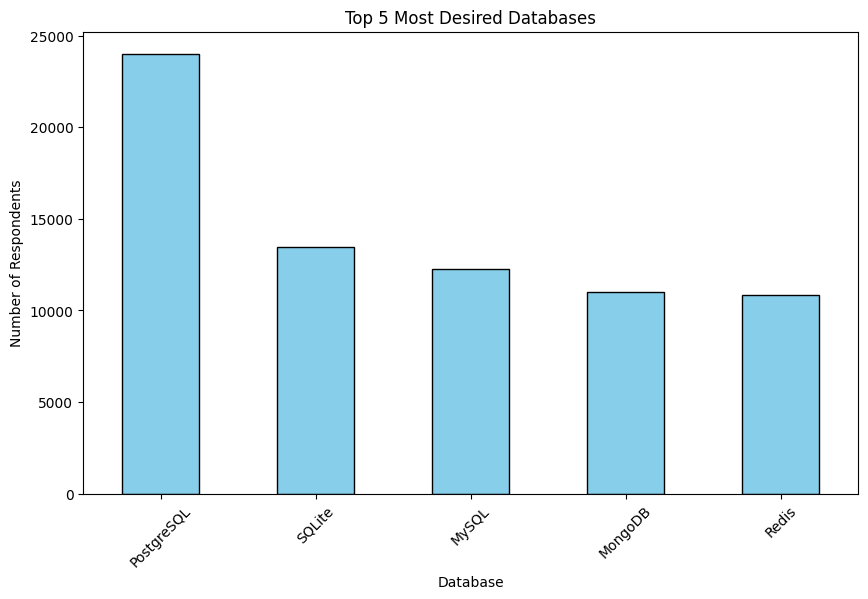

In [21]:
# Step 1: Query DatabaseWantToWorkWith column
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df_db = pd.read_sql_query(QUERY, conn)

# Step 2: Split multiple selections (since answers can be comma-separated)
db_series = df_db['DatabaseWantToWorkWith'].str.split(';').explode()

# Step 3: Count frequencies
db_counts = db_series.value_counts().head(5)

# Step 4: Plot histogram (bar chart)
plt.figure(figsize=(10,6))
db_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 Most Desired Databases')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


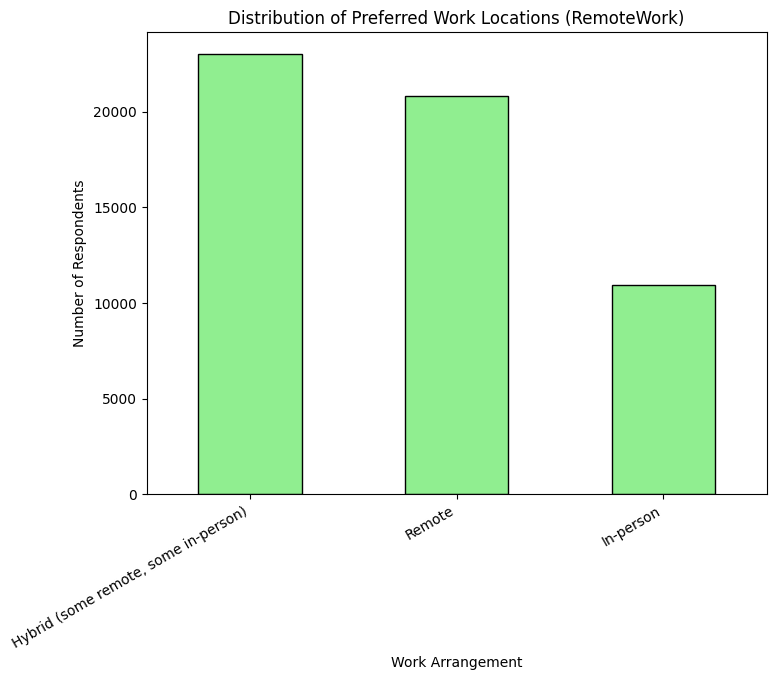

In [22]:
# Step 1: Query RemoteWork column
QUERY = """
SELECT RemoteWork
FROM main
WHERE RemoteWork IS NOT NULL
"""
df_remote = pd.read_sql_query(QUERY, conn)

# Step 2: Count frequencies
remote_counts = df_remote['RemoteWork'].value_counts()

# Step 3: Plot histogram (bar chart)
plt.figure(figsize=(8,6))
remote_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribution of Preferred Work Locations (RemoteWork)')
plt.xlabel('Work Arrangement')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=30, ha='right')
plt.show()



### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


Total mid-career records (45-64): 4767

Age distribution in mid-career group:
Age
45-54 years old    3495
55-64 years old    1272
Name: count, dtype: int64

Records by age group:
Age_Group
45-54    3495
55-64    1272
Name: count, dtype: int64

After removing compensation outliers (above $23,670,000.00): 4719 records


/tmp/ipykernel_1708/921893555.py:70: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=['45-54', '55-64'])


NameError: name 'np' is not defined

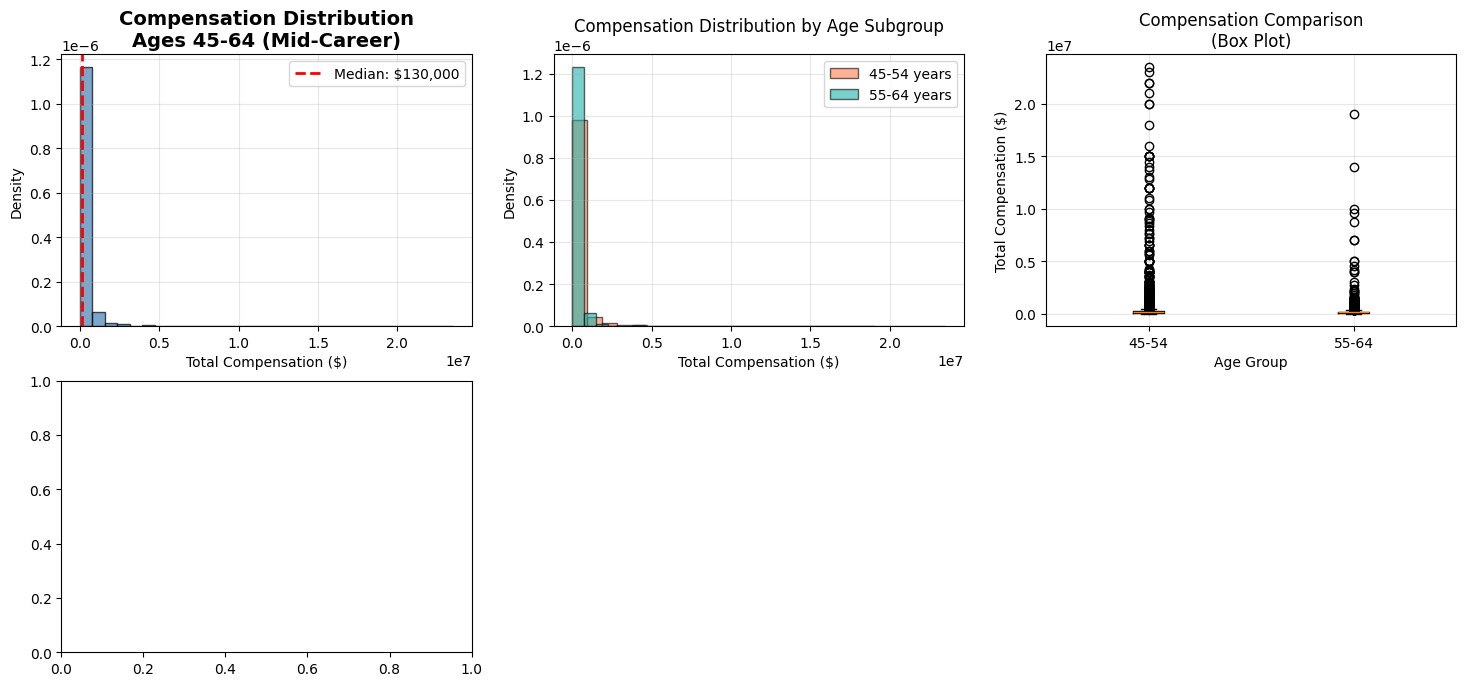

In [27]:
# Query data for CompTotal for ages 45 to 60
QUERY = """
SELECT Age, CompTotal 
FROM main 
WHERE Age IS NOT NULL 
AND CompTotal IS NOT NULL 
AND CompTotal > 0
AND Age IN ('45-54 years old', '55-64 years old')
"""
df_mid_career = pd.read_sql_query(QUERY, conn)

print(f"Total mid-career records (45-64): {len(df_mid_career)}")
print("\nAge distribution in mid-career group:")
print(df_mid_career['Age'].value_counts())

# Convert age to numerical groups for better analysis
df_mid_career['Age_Group'] = df_mid_career['Age'].replace({
    '45-54 years old': '45-54',
    '55-64 years old': '55-64'
})

print(f"\nRecords by age group:")
print(df_mid_career['Age_Group'].value_counts())

# Remove extreme outliers (top 1%) for better visualization
Q99 = df_mid_career['CompTotal'].quantile(0.99)
df_mid_career_filtered = df_mid_career[df_mid_career['CompTotal'] <= Q99]

print(f"\nAfter removing compensation outliers (above ${Q99:,.2f}): {len(df_mid_career_filtered)} records")

# Create comprehensive visualizations
plt.figure(figsize=(18, 12))

# 1. Main histogram for the entire mid-career group
plt.subplot(3, 3, 1)
plt.hist(df_mid_career_filtered['CompTotal'], bins=30, alpha=0.7, color='steelblue', 
         edgecolor='black', density=True)
plt.title('Compensation Distribution\nAges 45-64 (Mid-Career)', fontsize=14, fontweight='bold')
plt.xlabel('Total Compensation ($)')
plt.ylabel('Density')
plt.grid(alpha=0.3)

# Add median line
median_comp = df_mid_career_filtered['CompTotal'].median()
plt.axvline(median_comp, color='red', linestyle='--', linewidth=2, 
           label=f'Median: ${median_comp:,.0f}')
plt.legend()

# 2. Comparative histograms by age subgroup
plt.subplot(3, 3, 2)
# Age 45-54
data_45_54 = df_mid_career_filtered[df_mid_career_filtered['Age_Group'] == '45-54']['CompTotal']
plt.hist(data_45_54, bins=25, alpha=0.6, color='coral', edgecolor='black', 
         density=True, label='45-54 years')

# Age 55-64
data_55_64 = df_mid_career_filtered[df_mid_career_filtered['Age_Group'] == '55-64']['CompTotal']
plt.hist(data_55_64, bins=25, alpha=0.6, color='lightseagreen', edgecolor='black', 
         density=True, label='55-64 years')

plt.title('Compensation Distribution by Age Subgroup', fontsize=12)
plt.xlabel('Total Compensation ($)')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.3)

# 3. Box plot comparison
plt.subplot(3, 3, 3)
boxplot_data = [data_45_54, data_55_64]
plt.boxplot(boxplot_data, labels=['45-54', '55-64'])
plt.title('Compensation Comparison\n(Box Plot)', fontsize=12)
plt.xlabel('Age Group')
plt.ylabel('Total Compensation ($)')
plt.grid(alpha=0.3)

# 4. Statistical summary visualization
plt.subplot(3, 3, 4)
stats_data = df_mid_career_filtered.groupby('Age_Group')['CompTotal'].agg(['mean', 'median', 'std'])

x_pos = np.arange(len(stats_data.index))
width = 0.35

plt.bar(x_pos - width/2, stats_data['mean'], width, label='Mean', alpha=0.7, color='lightcoral', edgecolor='black')
plt.bar(x_pos + width/2, stats_data['median'], width, label='Median', alpha=0.7, color='lightblue', edgecolor='black')

plt.title('Mean vs Median Compensation\nby Age Group', fontsize=12)
plt.xlabel('Age Group')
plt.ylabel('Compensation ($)')
plt.xticks(x_pos, stats_data.index)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, (mean_val, median_val) in enumerate(zip(stats_data['mean'], stats_data['median'])):
    plt.text(i - width/2, mean_val + 2000, f'${mean_val:,.0f}', ha='center', va='bottom', fontsize=9)
    plt.text(i + width/2, median_val + 2000, f'${median_val:,.0f}', ha='center', va='bottom', fontsize=9)

# 5. Percentile analysis
plt.subplot(3, 3, 5)
percentiles = [25, 50, 75, 90]
percentile_data = {}

for age_group in ['45-54', '55-64']:
    group_data = df_mid_career_filtered[df_mid_career_filtered['Age_Group'] == age_group]['CompTotal']
    percentile_values = [group_data.quantile(p/100) for p in percentiles]
    percentile_data[age_group] = percentile_values

x = np.arange(len(percentiles))
width = 0.35

plt.bar(x - width/2, percentile_data['45-54'], width, label='45-54', alpha=0.7, color='coral', edgecolor='black')
plt.bar(x + width/2, percentile_data['55-64'], width, label='55-64', alpha=0.7, color='lightseagreen', edgecolor='black')

plt.title('Compensation Percentiles\nby Age Group', fontsize=12)
plt.xlabel('Percentile')
plt.ylabel('Compensation ($)')
plt.xticks(x, [f'{p}%' for p in percentiles])
plt.legend()
plt.grid(axis='y', alpha=0.3)

# 6. Cumulative distribution
plt.subplot(3, 3, 6)
for age_group, color in zip(['45-54', '55-64'], ['coral', 'lightseagreen']):
    group_data = df_mid_career_filtered[df_mid_career_filtered['Age_Group'] == age_group]['CompTotal']
    sorted_data = np.sort(group_data)
    y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, y, label=age_group, color=color, linewidth=2)

plt.title('Cumulative Distribution Function', fontsize=12)
plt.xlabel('Total Compensation ($)')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(alpha=0.3)

# 7. Kernel Density Estimation
plt.subplot(3, 3, 7)
from scipy import stats

for age_group, color in zip(['45-54', '55-64'], ['coral', 'lightseagreen']):
    group_data = df_mid_career_filtered[df_mid_career_filtered['Age_Group'] == age_group]['CompTotal']
    kde = stats.gaussian_kde(group_data)
    x_vals = np.linspace(group_data.min(), group_data.max(), 100)
    plt.plot(x_vals, kde(x_vals), label=age_group, color=color, linewidth=2)

plt.title('Kernel Density Estimation', fontsize=12)
plt.xlabel('Total Compensation ($)')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.3)

# 8. Compensation ranges analysis
plt.subplot(3, 3, 8)
comp_ranges = [0, 50000, 100000, 150000, 200000, 300000, 500000, float('inf')]
range_labels = ['<50K', '50-100K', '100-150K', '150-200K', '200-300K', '300-500K', '500K+']

range_data = {}
for age_group in ['45-54', '55-64']:
    group_data = df_mid_career_filtered[df_mid_career_filtered['Age_Group'] == age_group]['CompTotal']
    counts, _ = np.histogram(group_data, bins=comp_ranges)
    range_data[age_group] = (counts / len(group_data)) * 100

x = np.arange(len(range_labels))
width = 0.35

plt.bar(x - width/2, range_data['45-54'], width, label='45-54', alpha=0.7, color='coral', edgecolor='black')
plt.bar(x + width/2, range_data['55-64'], width, label='55-64', alpha=0.7, color='lightseagreen', edgecolor='black')

plt.title('Compensation Range Distribution (%)', fontsize=12)
plt.xlabel('Compensation Range')
plt.ylabel('Percentage of Group')
plt.xticks(x, range_labels, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Detailed statistical analysis
print("\n" + "="*80)
print("DETAILED COMPENSATION ANALYSIS FOR MID-CAREER DEVELOPERS (AGES 45-64)")
print("="*80)

# Overall statistics
print(f"\nOverall Mid-Career Statistics (n={len(df_mid_career_filtered)})")
print(f"Mean compensation: ${df_mid_career_filtered['CompTotal'].mean():,.2f}")
print(f"Median compensation: ${df_mid_career_filtered['CompTotal'].median():,.2f}")
print(f"Standard deviation: ${df_mid_career_filtered['CompTotal'].std():,.2f}")
print(f"25th percentile: ${df_mid_career_filtered['CompTotal'].quantile(0.25):,.2f}")
print(f"75th percentile: ${df_mid_career_filtered['CompTotal'].quantile(0.75):,.2f}")

# Statistics by age group
print("\n" + "-"*50)
print("COMPARISON BY AGE SUBGROUP")
print("-"*50)

for age_group in ['45-54', '55-64']:
    group_data = df_mid_career_filtered[df_mid_career_filtered['Age_Group'] == age_group]['CompTotal']
    
    print(f"\nAge Group: {age_group} (n={len(group_data)})")
    print(f"  Mean compensation: ${group_data.mean():,.2f}")
    print(f"  Median compensation: ${group_data.median():,.2f}")
    print(f"  Standard deviation: ${group_data.std():,.2f}")
    print(f"  10th percentile: ${group_data.quantile(0.10):,.2f}")
    print(f"  90th percentile: ${group_data.quantile(0.90):,.2f}")

# Statistical test for difference
from scipy import stats
group_45_54 = df_mid_career_filtered[df_mid_career_filtered['Age_Group'] == '45-54']['CompTotal']
group_55_64 = df_mid_career_filtered[df_mid_career_filtered['Age_Group'] == '55-64']['CompTotal']

t_stat, p_value = stats.ttest_ind(group_45_54, group_55_64, equal_var=False)

print(f"\nStatistical Comparison:")
print(f"T-test statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant difference found between age groups (p < 0.05)")
else:
    print("No significant difference found between age groups (p >= 0.05)")

# Compensation range analysis
print("\n" + "-"*50)
print("COMPENSATION RANGE BREAKDOWN")
print("-"*50)

for age_group in ['45-54', '55-64']:
    group_data = df_mid_career_filtered[df_mid_career_filtered['Age_Group'] == age_group]['CompTotal']
    
    print(f"\n{age_group} years:")
    for i in range(len(comp_ranges) - 1):
        lower = comp_ranges[i]
        upper = comp_ranges[i + 1]
        count = len(group_data[(group_data >= lower) & (group_data < upper)])
        percentage = (count / len(group_data)) * 100
        print(f"  ${lower:,.0f}-${upper:,.0f}: {count} respondents ({percentage:.1f}%)")

# Top earners analysis
print("\n" + "-"*50)
print("TOP EARNERS ANALYSIS (Top 10%)")
print("-"*50)

for age_group in ['45-54', '55-64']:
    group_data = df_mid_career_filtered[df_mid_career_filtered['Age_Group'] == age_group]['CompTotal']
    top_10_threshold = group_data.quantile(0.90)
    top_10_data = group_data[group_data >= top_10_threshold]
    
    print(f"\n{age_group} years (Top 10%):")
    print(f"  Threshold: ${top_10_threshold:,.2f}")
    print(f"  Average: ${top_10_data.mean():,.2f}")
    print(f"  Median: ${top_10_data.median():,.2f}")
    print(f"  Count: {len(top_10_data)} respondents")

print(f"\nOverall, mid-career developers (45-64) show:")
print(f"- Median compensation: ${df_mid_career_filtered['CompTotal'].median():,.0f}")
print(f"- Wide compensation range from ${df_mid_career_filtered['CompTotal'].min():,.0f} to ${df_mid_career_filtered['CompTotal'].max():,.0f}")
print(f"- {len(df_mid_career_filtered[df_mid_career_filtered['CompTotal'] >= 100000])/len(df_mid_career_filtered)*100:.1f}% earn $100K+")
print(f"- {len(df_mid_career_filtered[df_mid_career_filtered['CompTotal'] >= 200000])/len(df_mid_career_filtered)*100:.1f}% earn $200K+")

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


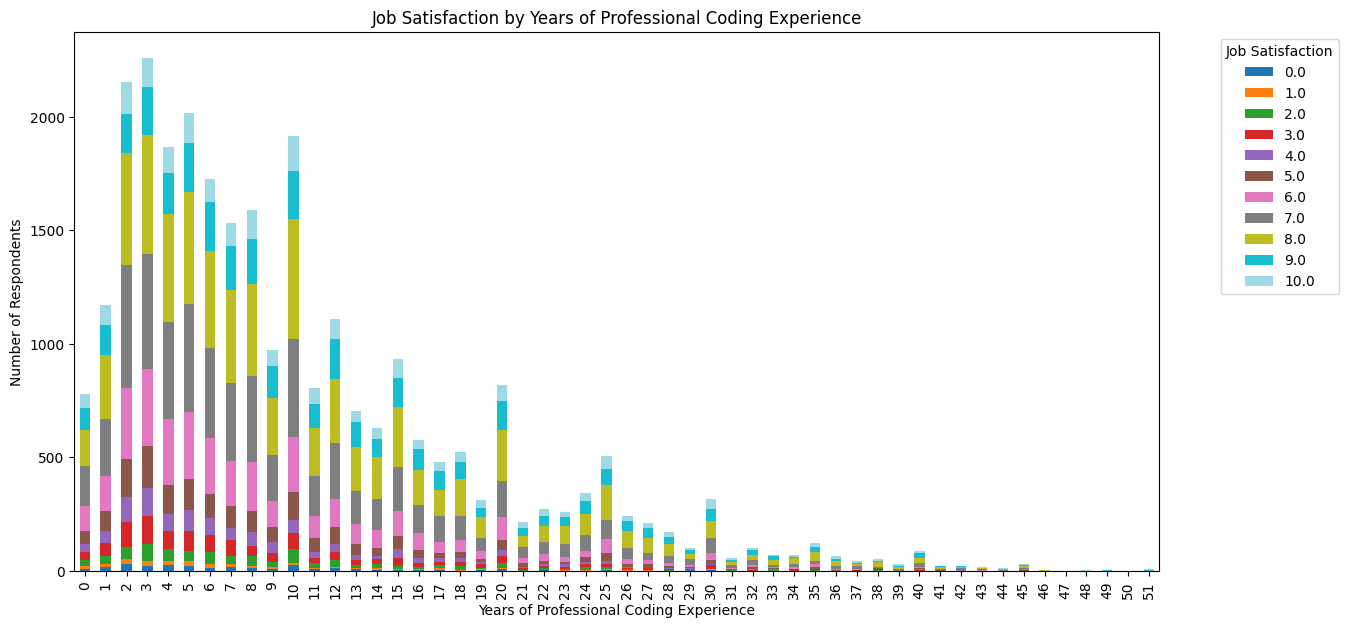

In [24]:
# Step 1: Query JobSat and YearsCodePro
QUERY = """
SELECT YearsCodePro, JobSat
FROM main
WHERE YearsCodePro IS NOT NULL
  AND JobSat IS NOT NULL
"""
df_jobsat = pd.read_sql_query(QUERY, conn)

# Step 2: Clean YearsCodePro (convert 'Less than 1 year' and 'More than 50 years')
def convert_years(x):
    if x == 'Less than 1 year':
        return 0
    elif x == 'More than 50 years':
        return 51
    else:
        try:
            return int(x)
        except:
            return None

df_jobsat['YearsCodePro'] = df_jobsat['YearsCodePro'].apply(convert_years)

# Step 3: Group data
jobsat_counts = pd.crosstab(df_jobsat['YearsCodePro'], df_jobsat['JobSat'])

# Step 4: Plot histogram (stacked bar)
jobsat_counts.plot(kind='bar', stacked=True, figsize=(14,7), colormap="tab20")
plt.title("Job Satisfaction by Years of Professional Coding Experience")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Number of Respondents")
plt.legend(title="Job Satisfaction", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
